# **Tarea 2 - EDA**: Top 100 songs in Spotify

- Nombre: Cruz Rangel Leonardo Said
- No. Cuenta: 316031062
- e-mail: leonardochow20@gmail.com

### **Contexto:**
Analizar las 100 canciones más populares de Spotify puede proporcionar información valiosa sobre las tendencias musicales actuales. Esto puede resultar especialmente interesante para la industria musical, ya que permite a los artistas y otros profesionales identificar oportunidades de mercado relevantes y adaptar su trabajo en consecuencia.

### **Objetivo:** 
Analizar las tendencias musicales actuales con el fin de encontrar información de interés que sea de ayuda al momento de desarrollar estrategias de marketing y promoción en la industria musical.

### **Diccionario de datos:**
- id - Unique ID given to each song on spotify
- name - name of the song
- duration - duration of the song in minutes
- energy - A perceptual measure of intensity and activity represented on a scale from 0.0 to 1.0 characterizes the energy of a song. Energetic tracks are typically characterized by a fast, loud, and noisy sound. For example, death metal scores high on the scale due to its high energy, while a Bach prelude would score low due to its low energy. Perceptual characteristics that contribute to energy include dynamic range (the difference between the loudest and softest parts of a song), perceived loudness, timbre (the quality of the sound), onset rate (the speed at which sounds begin), and general entropy (the amount of disorder in the sound).
- key - This attribute specifies the musical key of the track, with integers mapped to pitches using standard Pitch Class notation. For instance, 0 corresponds to the pitch C, 1 to C♯/D♭, 2 to D, and so on. If no key could be detected, the value of this attribute is -1.
- loudness -  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness - It is a measure of how "live" or "in-person" a recording of a song sounds.
- valence - measure the musical positiveness conveyed by a track, including the degree of happiness, cheerfulness, euphoria, or positivity in general, as perceived by the listener
- tempo - tempo in beats per minute (BPM), refers to the speed at which a track is played.
- danceability - measures the ease with which a song invites one to dance.

## **Importar bibliotecas y datos**

In [22]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [23]:
#Lee el dataset desde GitHub
features_df = pd.read_csv("https://raw.githubusercontent.com/chow-chow/DataMining/main/Data/spotify-mostStreamed/Features.csv")
features_df #Retorna el dataset

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5kqIPrATaCc2LqxVWzQGbk,7 Years,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765
96,3AJwUDP919kvQ9QcozQPxg,Yellow,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429
97,6UelLqGlWMcVH1E5c4H7lY,Sugar,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548
98,6habFhsOp2NvshLv26DqMb,Despacito,3.82,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655


In [24]:
streams_df = pd.read_csv("https://raw.githubusercontent.com/chow-chow/DataMining/main/Data/spotify-mostStreamed/Streams.csv")
streams_df # Retorna el dataset con el número de reproducciones de cada canción en el top

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,06-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17
...,...,...,...,...
95,7 Years,Lukas Graham,1.529,16-Jun-15
96,Yellow,Coldplay,1.527,26-Jun-00
97,Sugar,Maroon 5,1.524,29-Aug-14
98,Despacito,Luis Fonsi featuring Daddy Yankee,1.522,12-Jan-17


### **Top 10**

In [25]:
features_df.head(10)

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
5,3KkXRkHbMCARz0aVfEt68P,Sunflower,2.63,0.479,2,-5.574,1,0.0466,0.55600,0.000000,0.0703,0.913,89.911,0.760
6,1zi7xx7UVEFkmKfv06H8x0,One Dance,2.90,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,0.792
7,7BKLCZ1jbUBVqRi2FVlTVw,Closer,4.08,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,0.748
8,789CxjEOtO76BVD1A9yJQH,Stay,4.01,0.310,9,-10.164,0,0.0283,0.94500,0.000061,0.1170,0.125,111.893,0.621
9,0pqnGHJpmpxLKifKRmU6WP,Believer,3.41,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,0.776


In [26]:
streams_df.head(10)

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,06-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17
5,Sunflower,Post Malone and Swae Lee,2.575,18-Oct-18
6,One Dance,Drake featuring Wizkid and Kyla,2.556,05-Apr-16
7,Closer,The Chainsmokers featuring Halsey,2.481,29-Jul-16
8,Stay,The Kid Laroi and Justin Bieber,2.432,09-Jul-21
9,Believer,Imagine Dragons,2.410,01-Feb-17


## **Paso 1: Descripción de la estructura de datos**

1. Dimensiones del data frame: Se usa el atributo shape de pandas para ver el número de filas y columnas del dataset

In [27]:
# por definición el dataset tiene un total de 100 filas
features_df.shape

(100, 14)

In [28]:
# menor cantidad de columnas para el número de reproducciones
streams_df.shape

(100, 4)

2. Tipos de datos: Se usa el atributo <b>dtypes</b> para mostrar los tipos de datos que maneja el dataset y así poder definir el tipo de visualización que se hará dependiendo de si son variables categóricas o numéricas.

In [29]:
features_df.dtypes

id                   object
name                 object
duration            float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
danceability        float64
dtype: object

In [30]:
streams_df.dtypes

Song                   object
Artist                 object
Streams (Billions)    float64
Release Date           object
dtype: object

Se observa que los datasets contienen tanto variables categóricas como numéricas, sin embargo, las variables de interes son todas de tipo numérico, pues no se tomará en cuenta el nombre de la canción, artista y el id para el análisis.

## **Paso 2: Identificación de datos faltantes**

Se utiliza la función <b>isnull().sum()</b> de pandas para regresar la suma de todos los datos nulos que se encuentren en cada variable. Para este fin también se puede utilizar la función <b>info()</b>.

In [31]:
features_df.isnull().sum()

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64

In [32]:
streams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Song                100 non-null    object 
 1   Artist              100 non-null    object 
 2   Streams (Billions)  100 non-null    float64
 3   Release Date        100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


Afortunadamente no se tienen valores nulos en el dataset, por lo que no tendremos pérdida de información. 

## **Paso 3: Detección de valores atípicos**

La visualización de los datos por medio de gráficas es una herramienta que puede ser de utilidad al momento de detectar posibles inconsistencias en los datos, específicamente se debe analizar su distribución, es decir, cómo se comportan los datos y qué frecuencia tienen. Otra herramienta de ayuda es el resumen estadístico de los datos.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna.

1. Distribución de variables numéricas: Se utiliza la función hist() para obtener el histograma de las variables numéricas.

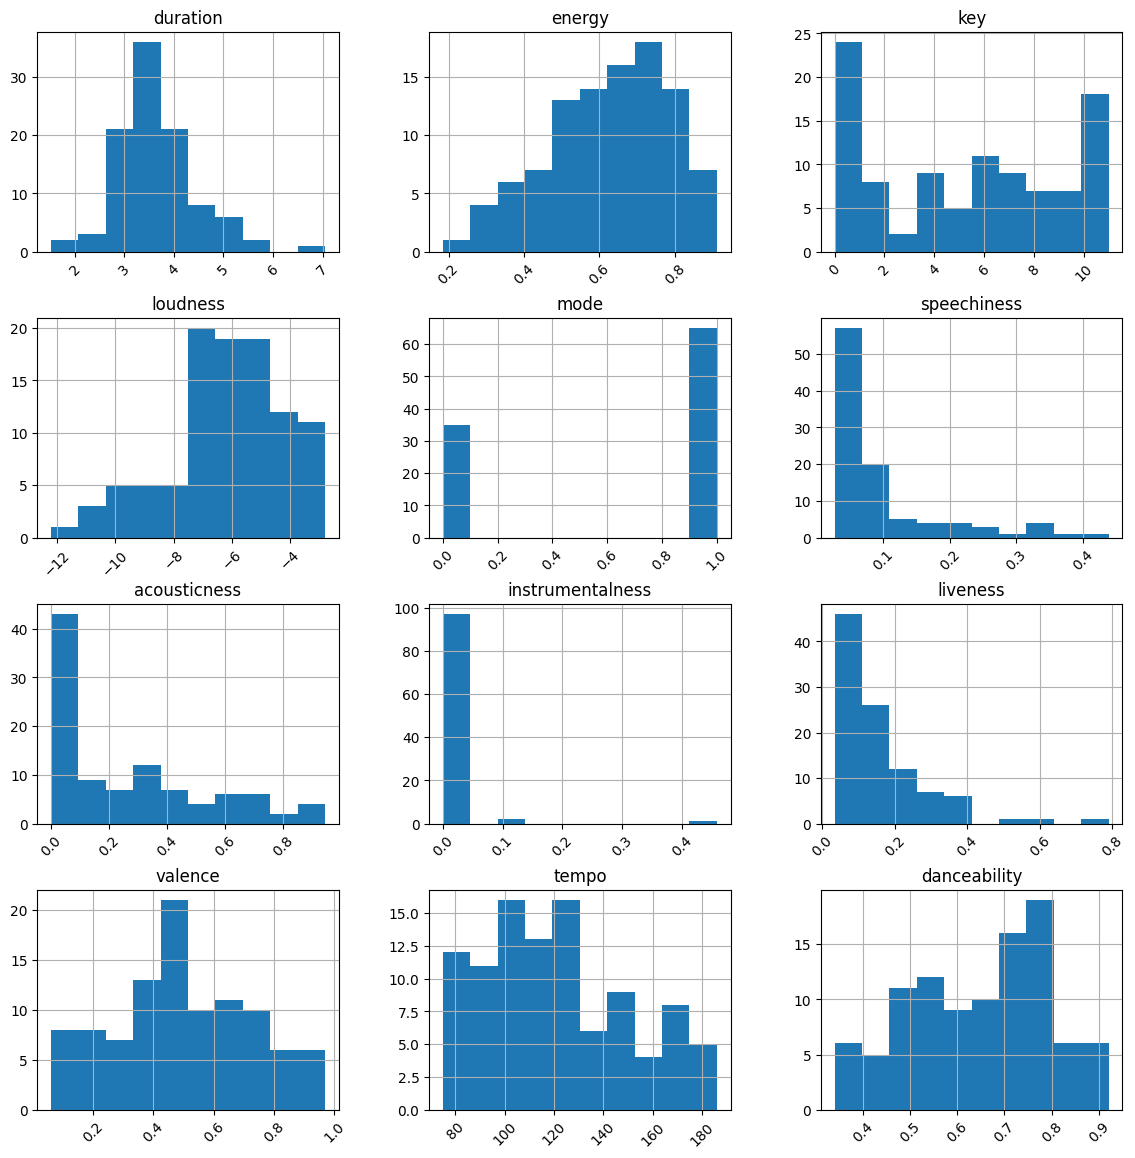

In [33]:
features_df.hist(figsize=(14,14), xrot=45)
plt.show()

En particular, no se identifican valores inconsistentes a simple vista, tal vez algunos valores únicos en <b>duration</b> y <b>instrumentalness</b> que parecen salirse del rango típico de los datos, pero esto no quiere decir que sean valores erroneos.

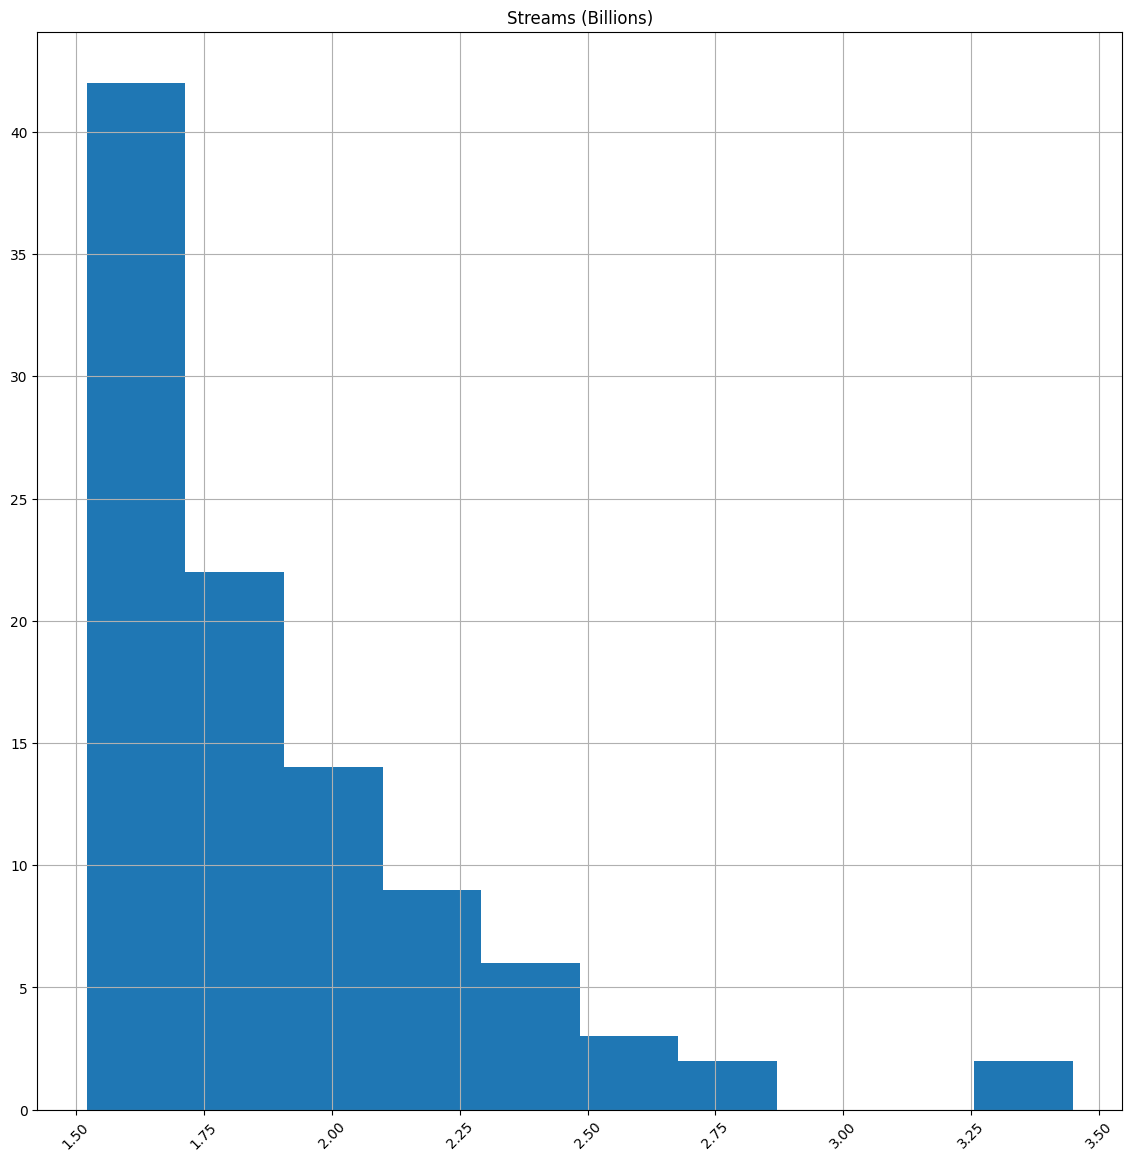

In [34]:
streams_df.hist(figsize=(14,14), xrot=45)
plt.show()

Para la cantidad de reproducciones en billones, la medida más alta corresponde a la canción en el top 1, no se trata de un error de medición, es un dato muy fuera de lo normal pero que tiene sentido considerando que hay canciones que se vuelven tendencia en todo el mundo.

2. Resumen estadístico de variables numéricas: se utiliza la función describe()

In [35]:
features_df.describe()

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.635300,0.625500,5.340000,-6.17631,0.650000,0.096448,0.260955,0.007848,0.165682,0.502032,121.253900,0.649630
std,0.807997,0.160045,3.627114,2.00858,0.479372,0.088872,0.272764,0.048977,0.122867,0.224953,29.544364,0.144618
min,1.520000,0.185000,0.000000,-12.20500,0.000000,0.028100,0.000025,0.000000,0.034400,0.061200,74.897000,0.340000
25%,3.122500,0.523750,2.000000,-7.10375,0.000000,0.041200,0.026150,0.000000,0.094300,0.340750,98.022000,0.548000
50%,3.505000,0.640000,6.000000,-5.97150,1.000000,0.059400,0.162500,0.000000,0.114000,0.492000,116.864000,0.671500
75%,4.030000,0.741000,8.250000,-4.94075,1.000000,0.106000,0.431500,0.000086,0.217000,0.663000,142.439500,0.759250
max,7.050000,0.912000,11.000000,-2.81000,1.000000,0.438000,0.945000,0.459000,0.790000,0.969000,186.003000,0.921000


3. Diagramas de caja: se utiliza la biblioteca <b>Seaborn</b>

En lo personal, los diagramas de caja son mi técnica favorita para visualizar los datos, esto porque hacen más fácil la identificación de valores que no se encuentran dentro de un rango.

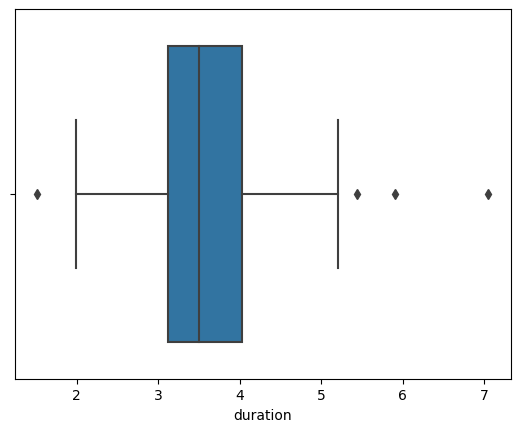

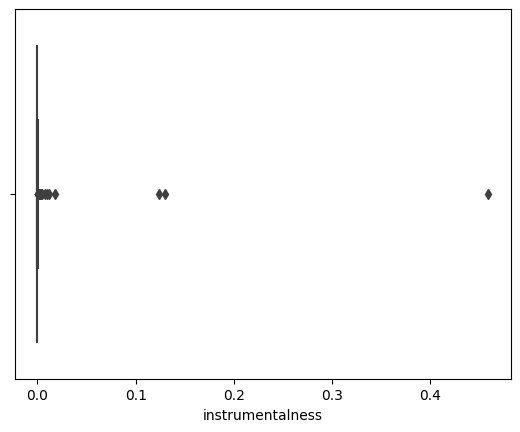

In [36]:
VariablesValoresAtipicos = ['duration', 'instrumentalness']
for col in VariablesValoresAtipicos:
  sns.boxplot(x=features_df[col])
  plt.show()

Acá podemos identificar varias cosas:
- duration:
    - La duración promedio de una canción es de 3.635300 min
    - Tanto el valor mínimo como el valor máximo para la duración se encuentran fuera del rango típico, sin embargo, son valores completamente aceptables cuando se trata de la duración de una canción, 1:52 min y 7:05 min respectivamente.

- instrumentalness: esta variable mide si una canción tiene o no voces, entre más cercano sea el valor a 1.0, mayor es la probabilidad de que no tenga contenido vocal.
    - La mayoría de canciones que se encuentran en el top 100 tienen voces, existen casos muy específicos en donde algunas canciones tienen mayor contenido instrumental que vocal y es totalmente válido.

    Se eligió mantener dichos valores porque representan correctamente las características de las canciones, además de que las canciones con alto contenido instrumental son una parte importante de la música, su eliminación de la muestra puede sesgar más los resultados que al mantenerlos.

## **Paso 4: Identificación de relaciones entre pares de variables**

Para este fin se utiliza una herramienta conocida como matriz de correlaciones, se utiliza la función corr().

Que dos variables estén relacionadas indica que son dependientes, "si una crece la otra también", es decir, si los pongo en una gráfica el comportamiento podría ser lineal y el valor indica el nivel de dispersión.

Los valores más cercanos a -1 y 1 indican relaciones fuertes, más especificamente si se encuentran en los rangos -0.6 a -1 y 0.6 a 1.

In [37]:
features_df.corr()

C:\Users\Leona\AppData\Local\Temp\ipykernel_19568\2297156001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features_df.corr()


,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
duration,1.000000,0.008279,-0.046875,0.073432,0.163916,-0.073938,-0.036542,-0.107450,-0.125603,-0.204426,0.063922,-0.200872
energy,0.008279,1.000000,-0.087542,0.741794,0.095255,-0.059644,-0.703552,-0.275034,-0.033251,0.238659,0.259863,0.014443
key,-0.046875,-0.087542,1.000000,-0.081339,-0.163244,0.034265,0.050492,0.206547,0.107961,0.031448,-0.092845,0.043416
loudness,0.073432,0.741794,-0.081339,1.000000,0.179088,-0.214009,-0.511177,-0.345350,-0.019159,0.260397,0.121916,0.139039
mode,0.163916,0.095255,-0.163244,0.179088,1.000000,-0.115282,-0.026593,-0.082794,-0.035042,-0.078952,-0.027820,-0.183288
speechiness,-0.073938,-0.059644,0.034265,-0.214009,-0.115282,1.000000,0.079030,0.009311,-0.007594,0.026603,0.172324,0.162089
acousticness,-0.036542,-0.703552,0.050492,-0.511177,-0.026593,0.079030,1.000000,0.226635,-0.122154,-0.139898,-0.235810,-0.186099
instrumentalness,-0.107450,-0.275034,0.206547,-0.345350,-0.082794,0.009311,0.226635,1.000000,0.029136,0.104192,-0.103372,-0.091968
liveness,-0.125603,-0.033251,0.107961,-0.019159,-0.035042,-0.007594,-0.122154,0.029136,1.000000,-0.169777,-0.090472,0.010374
valence,-0.204426,0.238659,0.031448,0.260397,-0.078952,0.026603,-0.139898,0.104192,-0.169777,1.000000,-0.059043,0.379643


Una mejor forma de visualizar estas correlaciones es por medio de un heatmap.

C:\Users\Leona\AppData\Local\Temp\ipykernel_19568\4068445980.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features_df.corr(), cmap='RdBu_r', annot=True)


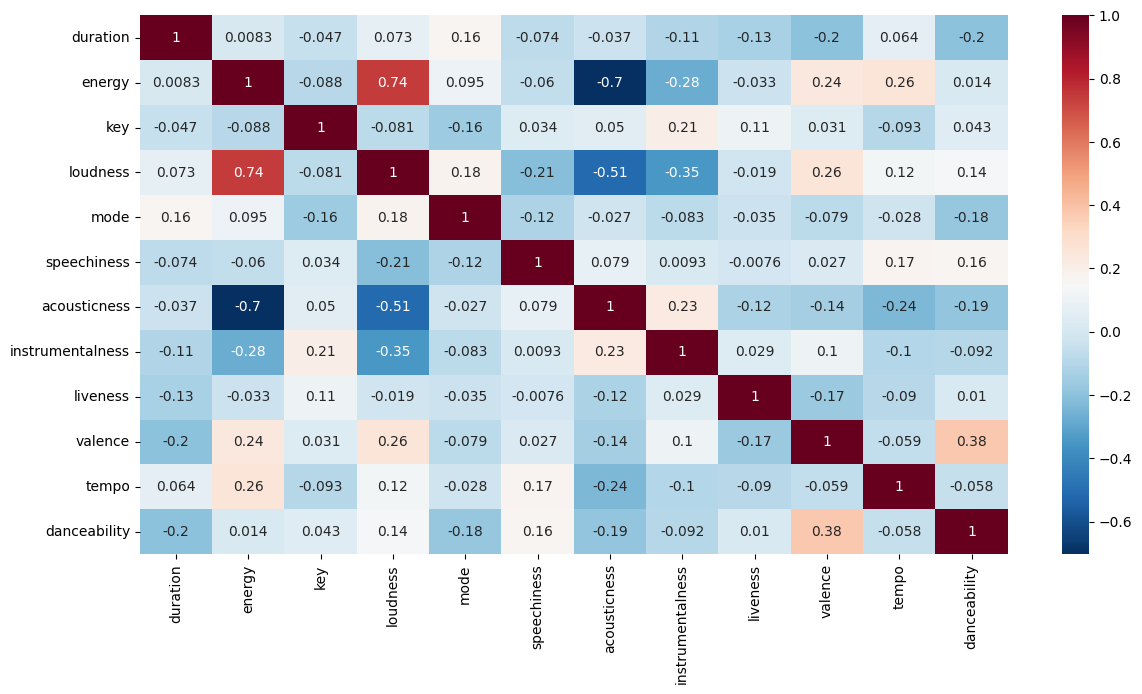

In [38]:
# Representa la correlación entre variables en forma de heatmap.
plt.figure(figsize=(14,7))
sns.heatmap(features_df.corr(), cmap='RdBu_r', annot=True)
plt.show()

Pareciera ser que la gran mayoría de variables son independientes, a excepción de **energy** que mantiene una relación fuerte con **loudness**(positiva) y con **acousticness**(negativa)

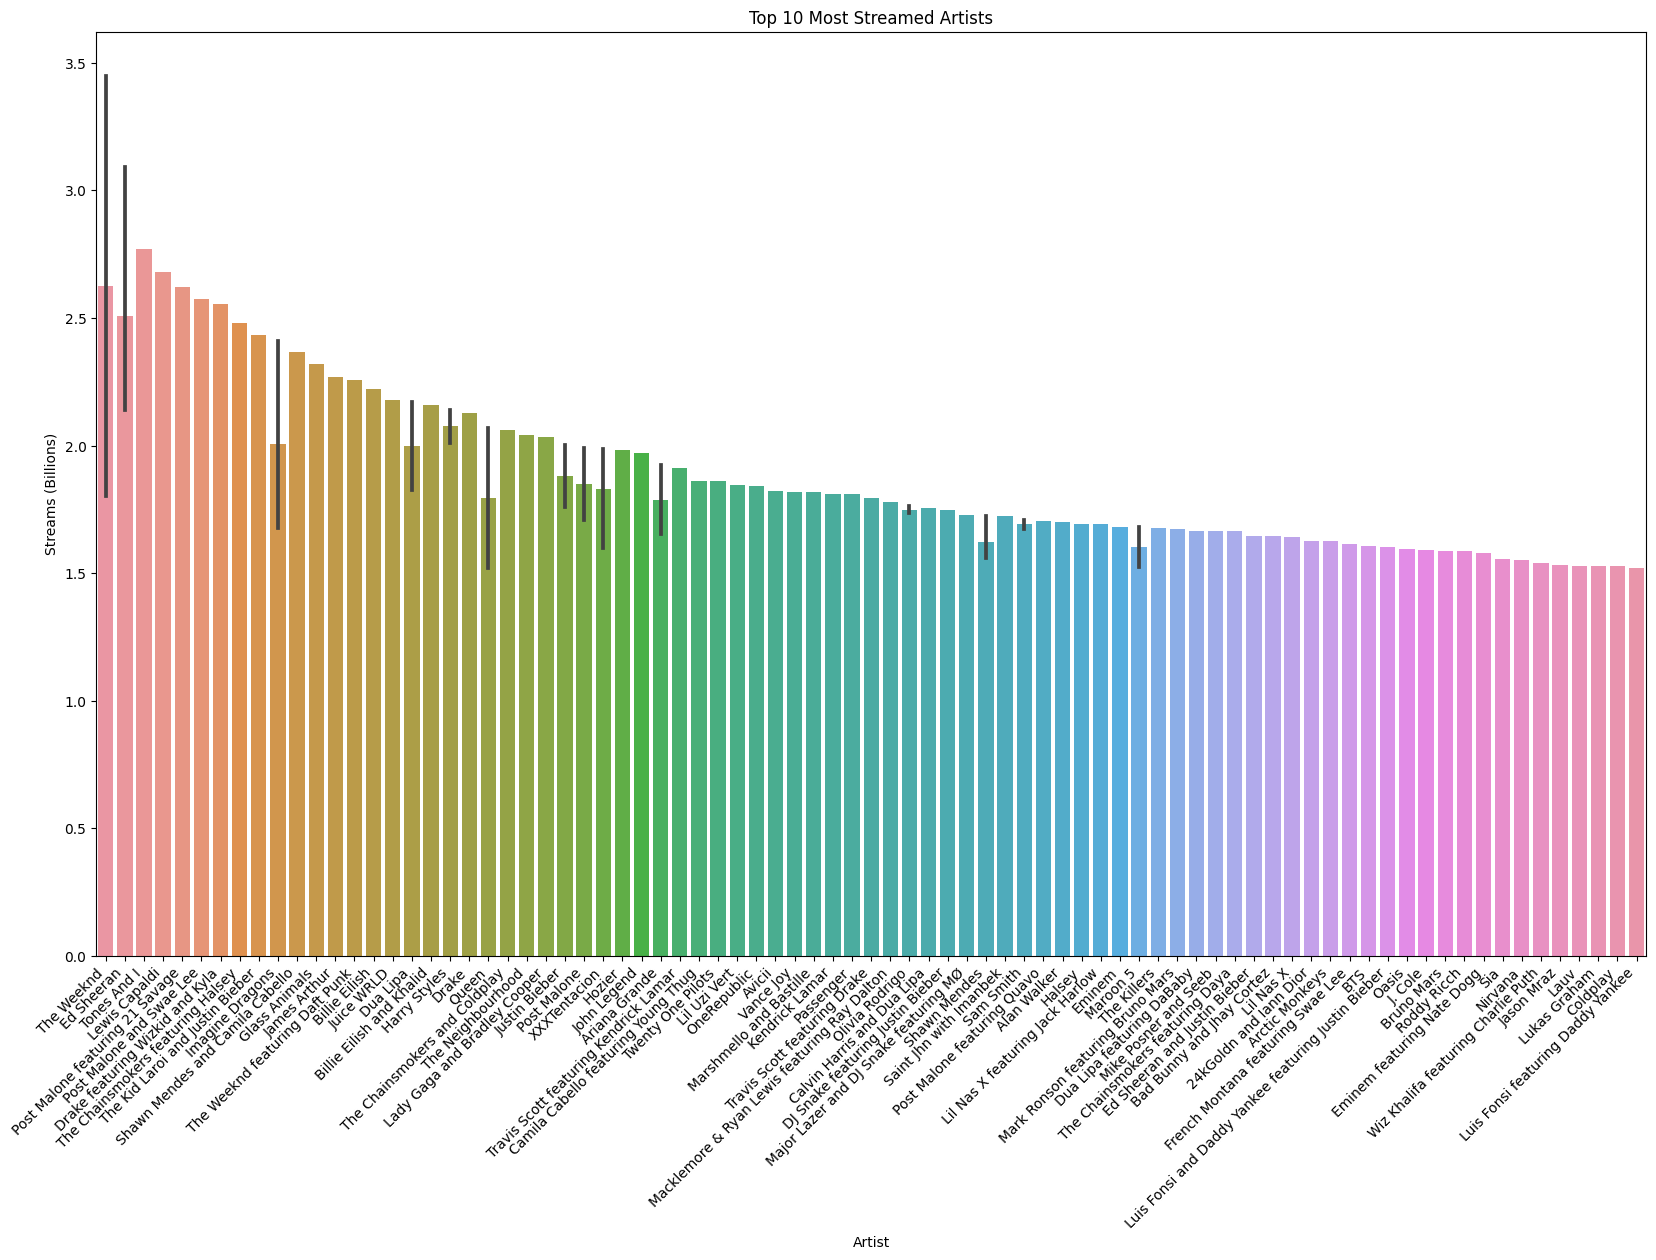

In [39]:
plt.figure(figsize=(20, 12))
sns.barplot(x="Artist", y="Streams (Billions)", data=streams_df)
plt.title("Top 10 Most Streamed Artists")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artist")
plt.ylabel("Streams (Billions)")
plt.show()